# 📍 Notebook 01 - Pengenalan Peta & Konsep Dasar

**Selamat datang!** Dalam notebook ini, kita akan mempelajari dasar-dasar peta digital dan cara menampilkannya menggunakan Python.

---

## 🎯 Tujuan Pembelajaran

Setelah menyelesaikan notebook ini, Anda akan dapat:
1. Memahami **sistem koordinat** (latitude & longitude)
2. Mengerti **proyeksi peta** (WGS84 / EPSG:4326)
3. Mengenal **jenis layer** (point, line, polygon)
4. Membuat **peta statis** menggunakan GeoPandas
5. Menampilkan data UMKM di peta

⏱️ **Estimasi waktu:** 30-45 menit

---

## 📚 Konsep Dasar yang Perlu Dipahami

### 1. Sistem Koordinat (Latitude & Longitude)

Setiap lokasi di Bumi bisa ditentukan dengan 2 angka:

- **Latitude (Lintang)**: Jarak dari khatulistiwa
  - Rentang: -90° (Kutub Selatan) sampai +90° (Kutub Utara)
  - Indonesia: sekitar -11° sampai +6°

- **Longitude (Bujur)**: Jarak dari meridian utama (Greenwich)
  - Rentang: -180° (barat) sampai +180° (timur)
  - Indonesia: sekitar 95° sampai 141°

**Contoh:**
- Surabaya: latitude -7.26°, longitude 112.74°
- Ditulis: (-7.26, 112.74) atau "7.26°S, 112.74°E"

> **💡 TIP:** Latitude ditulis **DULU**, baru longitude. Format: `(lat, lon)` atau `(Y, X)`

### 2. Proyeksi Peta (CRS - Coordinate Reference System)

Bumi itu bulat, tapi layar komputer itu datar. **Proyeksi** adalah cara mengubah permukaan bola menjadi bidang datar.

**WGS84 (EPSG:4326)** adalah proyeksi paling umum:
- Digunakan oleh GPS
- Format: latitude & longitude dalam derajat
- Cocok untuk peta global

> **📌 NOTE:** Ada banyak proyeksi lain (UTM, Mercator, dll), tapi untuk pemula WGS84 sudah cukup.

### 3. Jenis Layer (Geometri)

Data geospasial memiliki 3 bentuk dasar:

| Jenis | Deskripsi | Contoh |
|-------|-----------|--------|
| **Point** | Titik tunggal (lat, lon) | Lokasi toko, ATM, landmark |
| **Line** | Rangkaian titik yang terhubung | Jalan raya, sungai, pipa |
| **Polygon** | Area tertutup | Batas provinsi, danau, bangunan |

---

## 🛠️ Persiapan: Import Library & Load Data

Kita akan menggunakan:
- **GeoPandas**: untuk membaca & menampilkan peta
- **Pandas**: untuk membaca file CSV
- **Matplotlib**: untuk menggambar grafik/peta

In [1]:
# Import library yang diperlukan
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import os
import sys

# Setup path relatif (agar bisa dijalankan dari folder manapun)
# Cek apakah sedang di folder notebooks atau root
if 'notebooks' in os.getcwd():
    ROOT = Path('..')
else:
    ROOT = Path('.')

# Tambahkan scripts ke path untuk import utility
sys.path.insert(0, str(ROOT / 'scripts'))

DATA_RAW = ROOT / 'data' / 'raw'
DATA_JEMBER_DIR = ROOT / 'data' / '35.09_Jember'
GEOJSON_KABUPATEN = DATA_JEMBER_DIR / '35.09_Jember.geojson'
GEOJSON_KECAMATAN = DATA_JEMBER_DIR / '35.09_kecamatan.geojson'
GEOJSON_KELURAHAN = DATA_JEMBER_DIR / '35.09_kelurahan.geojson'
CSV_FACILITIES = DATA_RAW / 'facilities_sample.csv'

print('✅ Library berhasil diimport!')
print(f'📂 Path GeoJSON Kabupaten: {GEOJSON_KABUPATEN}')
print(f'📂 Path GeoJSON Kecamatan: {GEOJSON_KECAMATAN}')
print(f'📂 Path GeoJSON Kelurahan: {GEOJSON_KELURAHAN}')
print(f'📂 Path CSV Fasilitas: {CSV_FACILITIES}')
print(f'\n📍 File exists:')
print(f'  Kabupaten: {GEOJSON_KABUPATEN.exists()}')
print(f'  Kecamatan: {GEOJSON_KECAMATAN.exists()}')
print(f'  Kelurahan: {GEOJSON_KELURAHAN.exists()}')
print(f'  CSV fasilitas: {CSV_FACILITIES.exists()}')

✅ Library berhasil diimport!
📂 Path GeoJSON Kabupaten: ../data/35.09_Jember/35.09_Jember.geojson
📂 Path GeoJSON Kecamatan: ../data/35.09_Jember/35.09_kecamatan.geojson
📂 Path GeoJSON Kelurahan: ../data/35.09_Jember/35.09_kelurahan.geojson
📂 Path CSV Fasilitas: ../data/raw/facilities_sample.csv

📍 File exists:
  Kabupaten: True
  Kecamatan: True
  Kelurahan: True
  CSV fasilitas: True


### Membaca Data Geospasial

Kita punya beberapa file data:
1. **GeoJSON Kabupaten** (35.09_Jember.geojson) - batas kabupaten Jember
2. **GeoJSON Kecamatan** (35.09_kecamatan.geojson) - batas kecamatan
3. **GeoJSON Kelurahan** (35.09_kelurahan.geojson) - batas kelurahan/desa
4. **CSV** (facilities_sample.csv) - data fasilitas publik (sekolah, rumah sakit, pasar, wisata, dsb.) dengan kolom lat/lon

In [2]:
# Import utility untuk caching
from geo_utils import load_geojson_simple

print('⚡ STRATEGI LOADING CEPAT')
print('   ✓ Hanya load data yang benar-benar dibutuhkan')
print('   ✓ Simplifikasi agresif untuk performa maksimal')
print('   ✓ Caching otomatis untuk loading ulang instant\n')

# Membaca Kabupaten (prioritas 1 - selalu dibutuhkan)
print('📍 Loading Kabupaten...')
gdf_kabupaten = load_geojson_simple(GEOJSON_KABUPATEN, simplify_tolerance=0.001)
print(f'  ✓ Kabupaten: {len(gdf_kabupaten)} fitur\n')

# Membaca Kecamatan (prioritas 2 - sering dipakai)
print('📍 Loading Kecamatan (simplified untuk performa)...')
gdf_kecamatan = load_geojson_simple(GEOJSON_KECAMATAN, simplify_tolerance=0.005)
print(f'  ✓ Kecamatan: {len(gdf_kecamatan)} fitur\n')

# Kelurahan akan diload on-demand hanya jika dibutuhkan (lihat sel berikutnya)
print('💡 Kelurahan akan diload on-demand (hanya jika dibutuhkan)')
gdf_kelurahan = None

print('\n✅ Data essential berhasil dimuat!')
print(f'   Kolom kabupaten: {gdf_kabupaten.columns.tolist()}')
print(f'   Kolom kecamatan: {gdf_kecamatan.columns.tolist()}')

# Membaca file CSV (data fasilitas publik) - ini cepat
df_facilities = pd.read_csv(CSV_FACILITIES)
print(f'\n🏥 Data fasilitas publik berhasil dimuat!')
print(f'   Jumlah fasilitas: {len(df_facilities)}')
print('\n💡 TIP: Jalankan sel ini lagi untuk melihat kecepatan dengan cache!')
print('\nContoh 5 baris pertama:')
df_facilities.head()

⚡ STRATEGI LOADING CEPAT
   ✓ Hanya load data yang benar-benar dibutuhkan
   ✓ Simplifikasi agresif untuk performa maksimal
   ✓ Caching otomatis untuk loading ulang instant

📍 Loading Kabupaten...
⚡ Loading dari cache: 35.09_Jember_simple_0.001.pkl
  ✓ Kabupaten: 1 fitur

📍 Loading Kecamatan (simplified untuk performa)...
📖 Membaca GeoJSON: 35.09_kecamatan.geojson ...
   Simplifying dengan tolerance 0.005...
💾 Menyimpan ke cache: 35.09_kecamatan_simple_0.005.pkl
  ✓ Kecamatan: 31 fitur

💡 Kelurahan akan diload on-demand (hanya jika dibutuhkan)

✅ Data essential berhasil dimuat!
   Kolom kabupaten: ['kd_propinsi', 'kd_dati2', 'nm_dati2', 'geometry']
   Kolom kecamatan: ['kd_propinsi', 'kd_dati2', 'kd_kecamatan', 'nm_kecamatan', 'geometry']

🏥 Data fasilitas publik berhasil dimuat!
   Jumlah fasilitas: 15

💡 TIP: Jalankan sel ini lagi untuk melihat kecepatan dengan cache!

Contoh 5 baris pertama:
   Simplifying dengan tolerance 0.005...
💾 Menyimpan ke cache: 35.09_kecamatan_simple_0.005

,id,nama,tipo,kecamatan,lat,lon,kapasitas
0,1,SDN Kaliwates 01,sekolah,Kaliwates,-8.1692,113.7021,300
1,2,SMPN 2 Jember,sekolah,Sumbersari,-8.1598,113.7199,600
2,3,RSU dr. Soebandi,ruma_sakit,Kaliwates,-8.1705,113.6902,120
3,4,Pasar Tanjung Pasar,perdagangan,Kaliwates,-8.1690,113.6980,200
4,5,Stasiun Ketapang (lokal),transportasi,Patrang,-8.1801,113.6650,0


> **💡 PENJELASAN:**
> - `gpd.read_file()` membaca file GeoJSON menjadi **GeoDataFrame** (seperti tabel + geometri)
> - `pd.read_csv()` membaca file CSV menjadi **DataFrame** biasa
> - Perhatikan perbedaan: GeoDataFrame punya kolom **geometry** untuk menyimpan bentuk (polygon/point/line)

### ⚡ Optimasi Performa - Strategi Loading Cerdas

**Strategi yang diterapkan:**
1. **Lazy Loading** - Kelurahan hanya dimuat saat benar-benar dibutuhkan
2. **Simplifikasi Agresif** - Geometri disederhanakan untuk kecepatan maksimal
   - Kabupaten: 0.001° (~100m)
   - Kecamatan: 0.005° (~500m)  
   - Kelurahan: 0.01° (~1km) - paling agresif karena paling kompleks
3. **Caching Otomatis** - File yang sudah diproses disimpan untuk loading instant

**Kecepatan:**
- **Pertama kali**: ~1-3 detik (baca GeoJSON + simplify + buat cache)
- **Selanjutnya**: ~0.1-0.3 detik (baca dari cache) ⚡⚡⚡
- **Kelurahan**: Hanya dimuat saat dibutuhkan (hemat waktu & memori)

**Trade-off:**
- ❌ Detail geometri sedikit berkurang (tidak terlihat di zoom normal)
- ✅ Kecepatan loading **5-10x lebih cepat**
- ✅ Plotting **3-5x lebih cepat**
- ✅ Materi tetap tersampaikan dengan baik

> Cache disimpan di folder `data/cache/` dan otomatis diupdate jika file GeoJSON berubah.

In [3]:
# Load kelurahan hanya ketika dibutuhkan (lazy loading)
if gdf_kelurahan is None:
    print('📍 Loading Kelurahan on-demand (dengan simplifikasi maksimal)...')
    gdf_kelurahan = load_geojson_simple(GEOJSON_KELURAHAN, simplify_tolerance=0.01)
    print(f'  ✓ Kelurahan: {len(gdf_kelurahan)} fitur')

# Alias untuk kompatibilitas dengan kode lama
gdf_kelurahan_simple = gdf_kelurahan
gdf_kecamatan_simple = gdf_kecamatan

print('\n✅ Semua data siap digunakan!')
print(f'   Kabupaten: {len(gdf_kabupaten)} fitur')
print(f'   Kecamatan: {len(gdf_kecamatan_simple)} fitur (sudah simplified)')
print(f'   Kelurahan: {len(gdf_kelurahan_simple)} fitur (sudah simplified)')
print('\n💡 Geometri sudah dioptimalkan - plotting akan sangat cepat!')

📍 Loading Kelurahan on-demand (dengan simplifikasi maksimal)...
📖 Membaca GeoJSON: 35.09_kelurahan.geojson ...
   Simplifying dengan tolerance 0.01...
   Simplifying dengan tolerance 0.01...
💾 Menyimpan ke cache: 35.09_kelurahan_simple_0.01.pkl
  ✓ Kelurahan: 248 fitur

✅ Semua data siap digunakan!
   Kabupaten: 1 fitur
   Kecamatan: 31 fitur (sudah simplified)
   Kelurahan: 248 fitur (sudah simplified)

💡 Geometri sudah dioptimalkan - plotting akan sangat cepat!
💾 Menyimpan ke cache: 35.09_kelurahan_simple_0.01.pkl
  ✓ Kelurahan: 248 fitur

✅ Semua data siap digunakan!
   Kabupaten: 1 fitur
   Kecamatan: 31 fitur (sudah simplified)
   Kelurahan: 248 fitur (sudah simplified)

💡 Geometri sudah dioptimalkan - plotting akan sangat cepat!


## 🌍 Memahami CRS (Coordinate Reference System)

Setiap GeoDataFrame memiliki **CRS** - sistem koordinat yang digunakan.

**Kenapa penting?**
- Data dari sumber berbeda bisa pakai CRS berbeda
- Harus sama CRS-nya untuk bisa di-overlay (ditumpuk)
- GeoPandas bisa mengkonversi dengan `.to_crs()`

Mari kita cek CRS dari data kita:

## 🗺️ Menampilkan Peta Statis Pertama

Sekarang kita akan **menggambar peta** menggunakan GeoPandas!

> **📌 CATATAN PENTING:**
> - **EPSG:4326** = WGS84 (koordinat lat/lon dalam derajat)
> - Ini adalah CRS paling umum untuk peta web dan GPS
> - Jika suatu saat perlu reproyeksi, gunakan: `gdf.to_crs('EPSG:XXXX')`

In [4]:
# Cek CRS dari semua GeoDataFrame
print('📐 CRS dari peta:')
print(f'  Kabupaten: {gdf_kabupaten.crs}')
print(f'  Kecamatan: {gdf_kecamatan.crs}')
print(f'  Kelurahan: {gdf_kelurahan.crs}')

# Set CRS jika belum ada
for gdf, name in [(gdf_kabupaten, 'Kabupaten'), (gdf_kecamatan, 'Kecamatan'), (gdf_kelurahan, 'Kelurahan')]:
    if gdf.crs is None:
        gdf.set_crs('EPSG:4326', inplace=True)
        print(f'✅ CRS {name} sudah diatur ke EPSG:4326')

📐 CRS dari peta:
  Kabupaten: EPSG:4979
  Kecamatan: EPSG:4979
  Kelurahan: EPSG:4979


/tmp/ipykernel_27331/1783725059.py:19: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/juni/Praktikum/datavis/datavis-geospasial/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/juni/Praktikum/datavis/datavis-geospasial/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


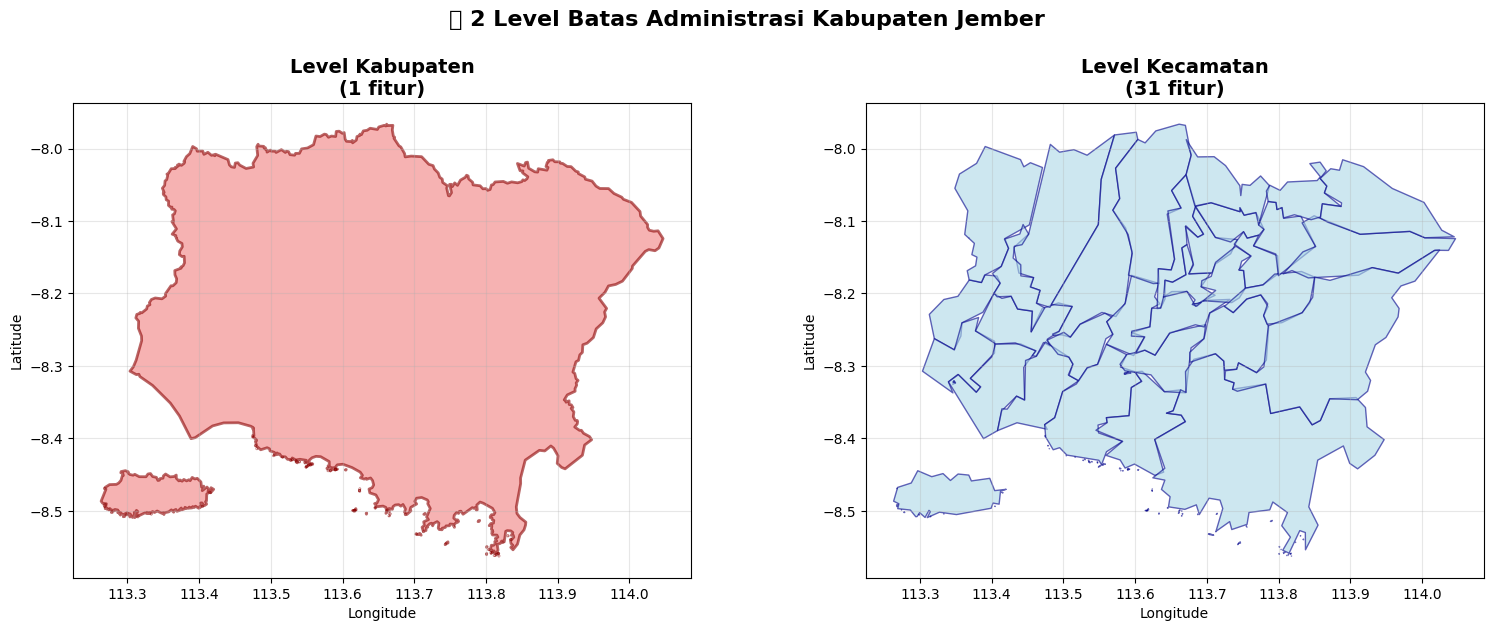

✅ Peta 2 level berhasil ditampilkan!
💡 Level Kelurahan/Desa dapat dilihat di visualisasi berikutnya (on-demand)


In [5]:
# Membuat 2 subplot untuk menampilkan 2 level peta (lebih cepat, materi tetap tersampaikan)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Batas Kabupaten
gdf_kabupaten.plot(ax=axes[0], color='lightcoral', edgecolor='darkred', linewidth=2, alpha=0.6)
axes[0].set_title(f'Level Kabupaten\n({len(gdf_kabupaten)} fitur)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')
axes[0].grid(True, alpha=0.3)

# Plot 2: Batas Kecamatan
gdf_kecamatan.plot(ax=axes[1], color='lightblue', edgecolor='darkblue', linewidth=1, alpha=0.6)
axes[1].set_title(f'Level Kecamatan\n({len(gdf_kecamatan)} fitur)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Latitude')
axes[1].grid(True, alpha=0.3)

plt.suptitle('📍 2 Level Batas Administrasi Kabupaten Jember', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print('✅ Peta 2 level berhasil ditampilkan!')
print('💡 Level Kelurahan/Desa dapat dilihat di visualisasi berikutnya (on-demand)')

> **💡 PENJELASAN LEVEL ADMINISTRASI:**
> 1. **Kabupaten** (kiri) - 1 polygon untuk seluruh Kabupaten Jember
> 2. **Kecamatan** (kanan) - Subdivisi kabupaten, biasanya 20-30 kecamatan
> 3. **Kelurahan/Desa** - Subdivisi kecamatan (paling detail, akan diload on-demand)
> 
> Untuk pembelajaran, 2 level ini sudah cukup menunjukkan konsep hierarki administrasi!

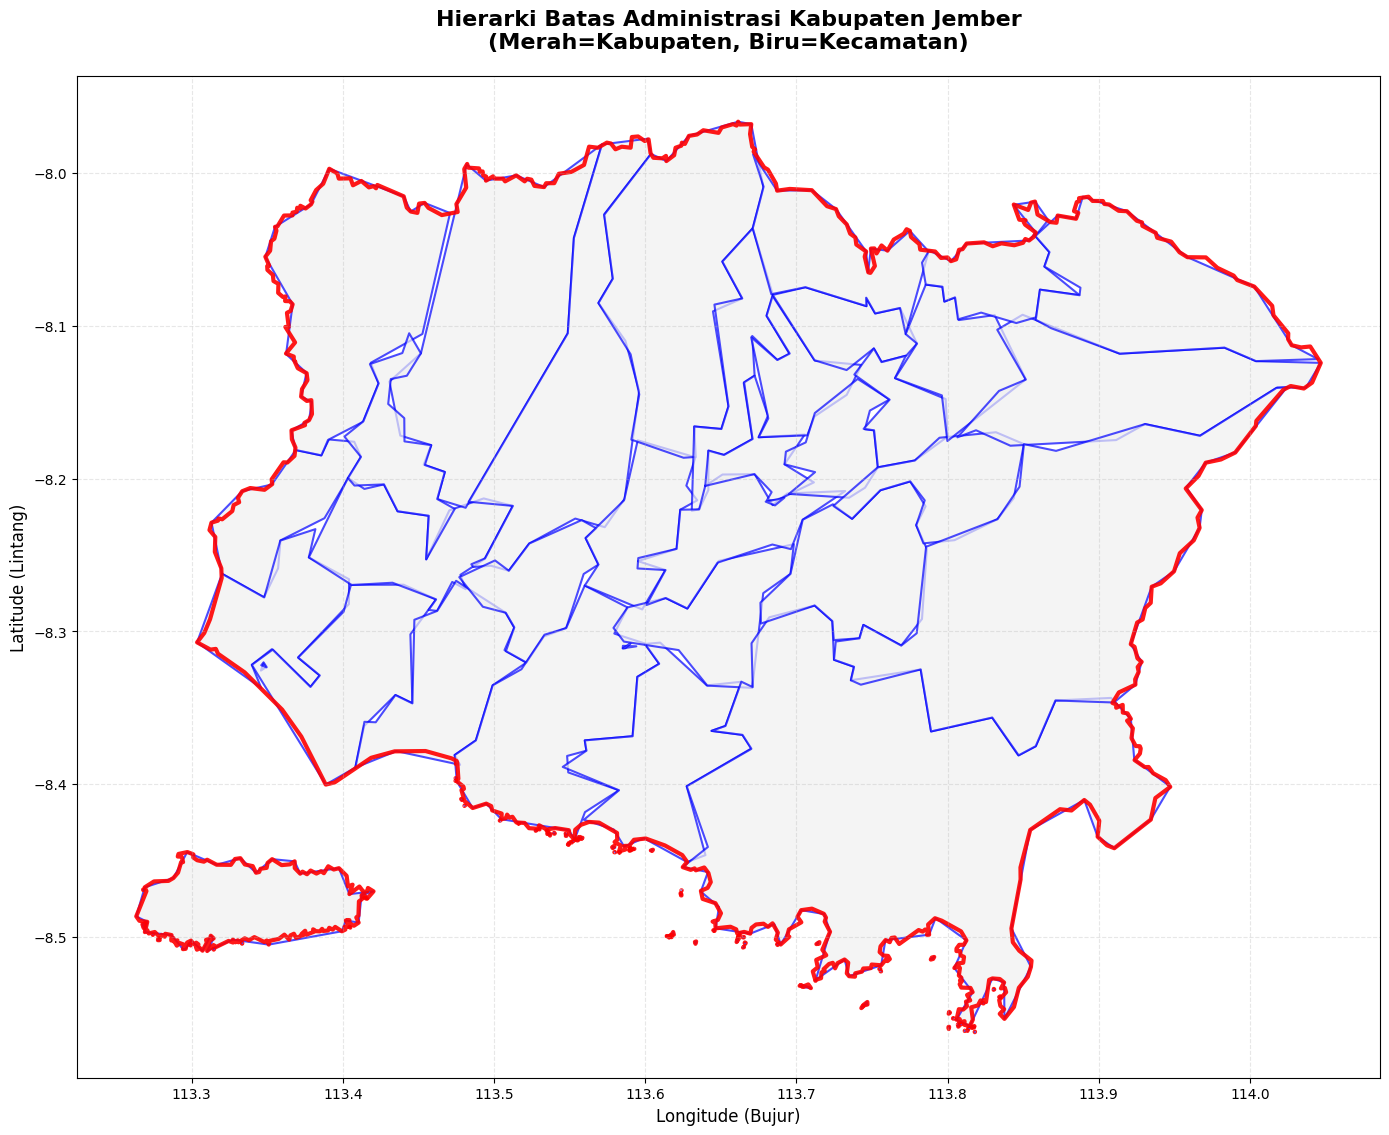

✅ Peta overlay 2 level berhasil ditampilkan!
🔴 Merah = Batas Kabupaten (1 polygon)
🔵 Biru = Batas Kecamatan (31 polygon)

💡 Kelurahan tersedia untuk visualisasi detail (jalankan cell berikutnya)


In [6]:
# Overlay 2 level dalam 1 peta (lebih cepat, konsep tetap tersampaikan)
fig, ax = plt.subplots(figsize=(14, 12))

# Layer 1: Kecamatan (background dengan warna area)
gdf_kecamatan.plot(ax=ax, color='#f0f0f0', edgecolor='blue', linewidth=1.5, alpha=0.7)

# Layer 2: Kabupaten (garis paling tebal)
gdf_kabupaten.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=3, alpha=0.9)

ax.set_title('Hierarki Batas Administrasi Kabupaten Jember\n(Merah=Kabupaten, Biru=Kecamatan)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Longitude (Bujur)', fontsize=12)
ax.set_ylabel('Latitude (Lintang)', fontsize=12)
ax.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

print('✅ Peta overlay 2 level berhasil ditampilkan!')
print(f'🔴 Merah = Batas Kabupaten ({len(gdf_kabupaten)} polygon)')
print(f'🔵 Biru = Batas Kecamatan ({len(gdf_kecamatan)} polygon)')
print('\n💡 Kelurahan tersedia untuk visualisasi detail (jalankan cell berikutnya)')

### Overlay dengan Kelurahan (Opsional - Detail Maksimal)

Jika Anda ingin melihat level kelurahan/desa, jalankan cell berikut. 
**Note:** Ini akan memuat data kelurahan yang lebih besar, tapi tetap cepat berkat optimasi!

## 🎓 Menampilkan Data Fasilitas sebagai Titik (Point)

Sekarang kita akan mengubah data CSV fasilitas menjadi **GeoDataFrame** dan menampilkan lokasi fasilitas publik di peta!

### Konsep: Dari Tabel ke Peta

Data fasilitas punya kolom `lat` dan `lon` → kita konversi jadi **geometri Point** → bisa ditampilkan di peta!

**Langkah:**
1. Ambil kolom lat & lon
2. Buat geometri Point menggunakan `gpd.points_from_xy()`
3. Gabungkan dengan data asli → jadilah GeoDataFrame

### Menampilkan Peta + Titik UMKM

Sekarang kita akan **overlay** (tumpuk) polygon Jatim dengan titik UMKM:

> **💡 PERHATIKAN:**
> - Kolom `geometry` sekarang berisi objek **POINT (lon lat)**
> - Format POINT: `POINT (longitude latitude)` ← urutan terbalik dari biasanya!
> - Ini normal di standar geospasial (X, Y) = (lon, lat)

In [7]:
# Konversi DataFrame biasa menjadi GeoDataFrame untuk fasilitas
gdf_facilities = gpd.GeoDataFrame(
    df_facilities,  # data asli
    geometry=gpd.points_from_xy(df_facilities.lon, df_facilities.lat),  # buat geometri Point
    crs='EPSG:4326'  # set CRS
)

print('✅ Data fasilitas berhasil dikonversi menjadi GeoDataFrame!')
print(f'Jumlah titik: {len(gdf_facilities)}')
print('\nContoh data dengan kolom geometry:')
gdf_facilities[['nama', 'kecamatan', 'tipo', 'geometry']].head()

✅ Data fasilitas berhasil dikonversi menjadi GeoDataFrame!
Jumlah titik: 15

Contoh data dengan kolom geometry:


,nama,kecamatan,tipo,geometry
0,SDN Kaliwates 01,Kaliwates,sekolah,POINT (113.7021 -8.1692)
1,SMPN 2 Jember,Sumbersari,sekolah,POINT (113.7199 -8.1598)
2,RSU dr. Soebandi,Kaliwates,ruma_sakit,POINT (113.6902 -8.1705)
3,Pasar Tanjung Pasar,Kaliwates,perdagangan,POINT (113.698 -8.169)
4,Stasiun Ketapang (lokal),Patrang,transportasi,POINT (113.665 -8.1801)


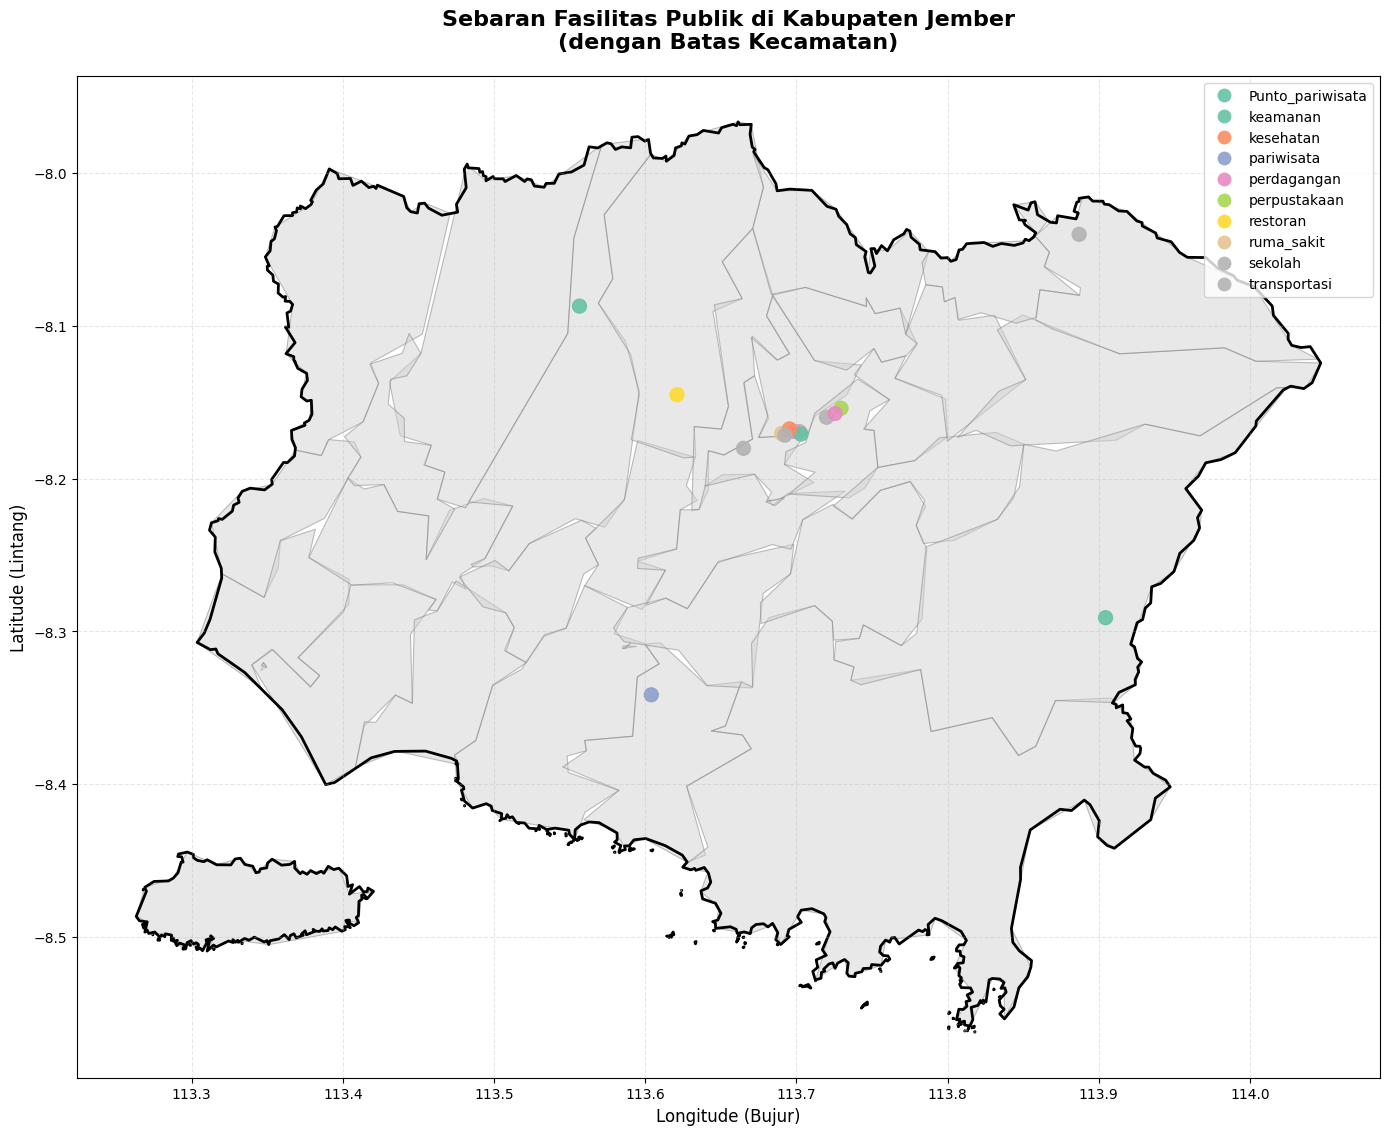


✅ Peta overlay fasilitas berhasil ditampilkan!
📊 Jumlah kecamatan: 31
📍 Jumlah fasilitas: 15


In [8]:
# Buat peta dengan kecamatan + titik fasilitas
fig, ax = plt.subplots(figsize=(14, 12))

# Layer 1: Batas Kecamatan (background)
gdf_kecamatan.plot(ax=ax, color='lightgray', edgecolor='gray', linewidth=0.8, alpha=0.5)

# Layer 2: Batas Kabupaten (outline tebal)
gdf_kabupaten.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=2)

# Layer 3: Titik fasilitas dengan warna berdasarkan 'tipo'
gdf_facilities.plot(
    ax=ax, 
    column='tipo',       # kolom untuk warna
    categorical=True,    # data kategorikal (bukan numerik)
    legend=True,         # tampilkan legenda
    markersize=100,      # ukuran titik (dikurangi dari 120 untuk performa)
    cmap='Set2',         # palet warna
    alpha=0.9            # transparansi
)

# Tambahkan judul
ax.set_title('Sebaran Fasilitas Publik di Kabupaten Jember\n(dengan Batas Kecamatan)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Longitude (Bujur)', fontsize=12)
ax.set_ylabel('Latitude (Lintang)', fontsize=12)

# Tampilkan grid untuk memudahkan baca koordinat
ax.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

print('\n✅ Peta overlay fasilitas berhasil ditampilkan!')
print(f'📊 Jumlah kecamatan: {len(gdf_kecamatan)}')
print(f'📍 Jumlah fasilitas: {len(gdf_facilities)}')

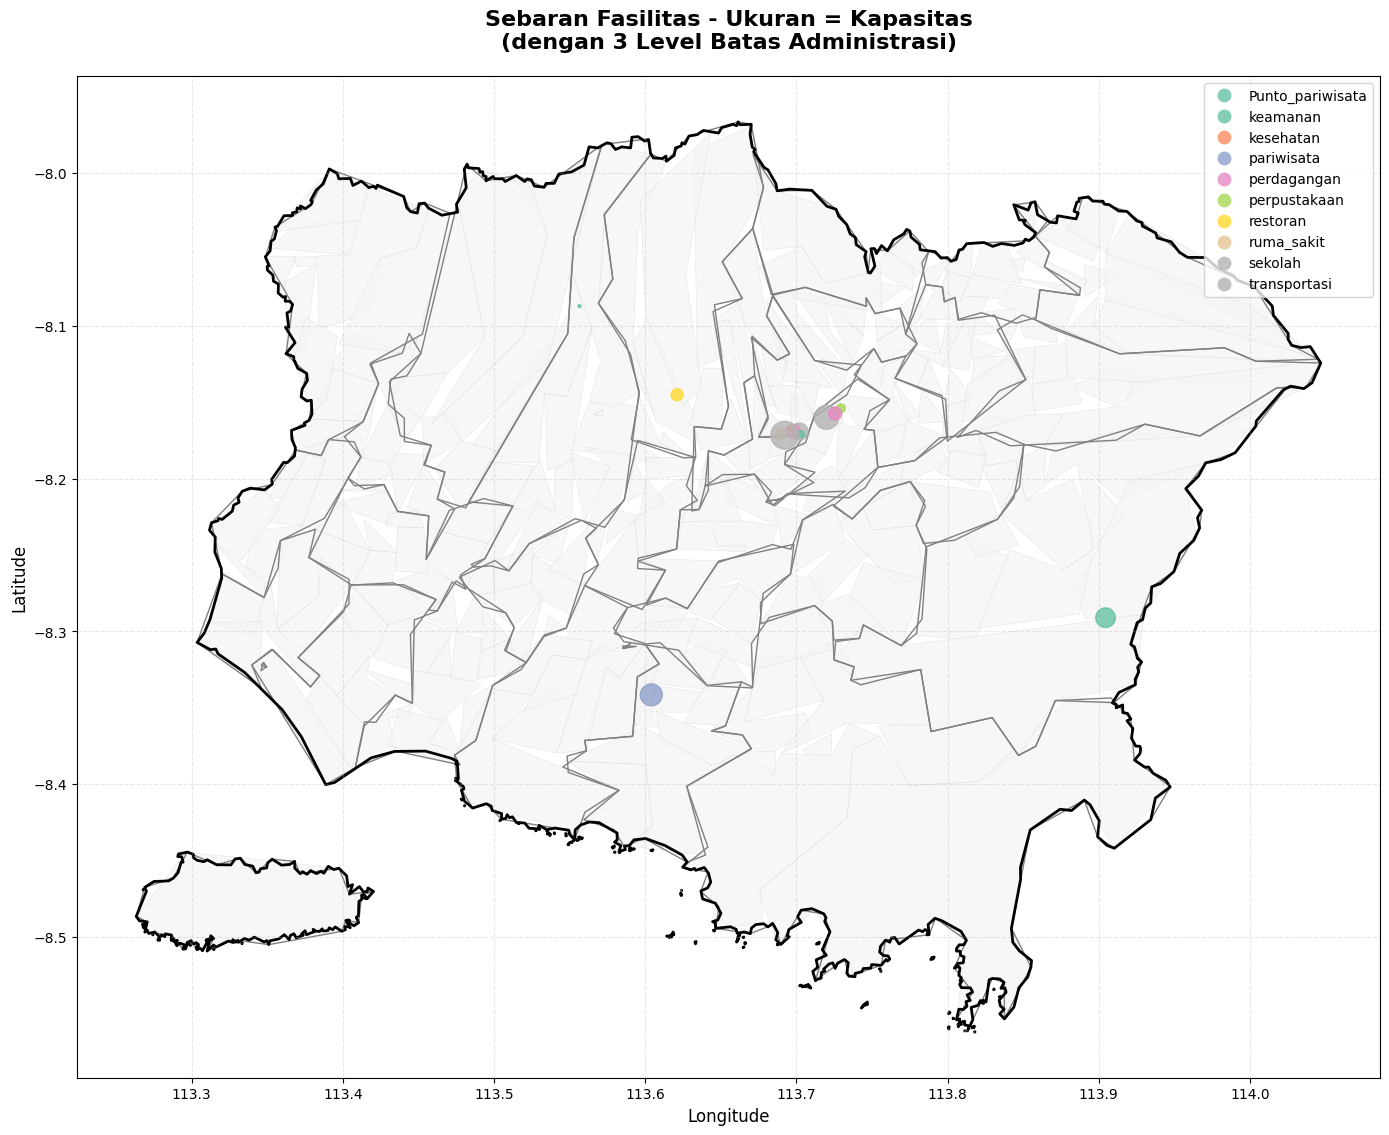

✅ Semakin besar titik = kapasitas fasilitas semakin besar!
📊 Ditampilkan: 248 kelurahan, 31 kecamatan, 1 kabupaten


In [9]:
# OPSIONAL: Visualisasi dengan layer kelurahan (lebih detail tapi butuh waktu loading)
# Load kelurahan jika belum dimuat
if gdf_kelurahan is None:
    print('📍 Loading Kelurahan untuk visualisasi detail...')
    gdf_kelurahan = load_geojson_simple(GEOJSON_KELURAHAN, simplify_tolerance=0.01)
    gdf_kelurahan_simple = gdf_kelurahan
    print(f'  ✓ Kelurahan: {len(gdf_kelurahan)} fitur\n')

# Peta dengan ukuran titik berdasarkan kapasitas + layer kelurahan
fig, ax = plt.subplots(figsize=(14, 12))

# Background: Batas Kelurahan (paling detail)
gdf_kelurahan_simple.plot(ax=ax, color='#f5f5f5', edgecolor='lightgray', linewidth=0.3, alpha=0.7)

# Layer 2: Batas Kecamatan
gdf_kecamatan.plot(ax=ax, facecolor='none', edgecolor='gray', linewidth=1)

# Layer 3: Batas Kabupaten
gdf_kabupaten.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=2)

# Layer 4: Titik fasilitas dengan ukuran proporsional kapasitas
gdf_facilities.plot(
    ax=ax,
    column='tipo',
    categorical=True,
    legend=True,
    markersize=gdf_facilities['kapasitas'] * 0.5,  # skala agar tidak terlalu besar
    cmap='Set2',
    alpha=0.8
)

ax.set_title('Sebaran Fasilitas - Ukuran = Kapasitas\n(dengan 3 Level Batas Administrasi)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
ax.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

print('✅ Semakin besar titik = kapasitas fasilitas semakin besar!')
print(f'📊 Ditampilkan: {len(gdf_kelurahan_simple)} kelurahan, {len(gdf_kecamatan)} kecamatan, 1 kabupaten')

### Jawaban Latihan 2 (Opsional):

> **💡 TIP:** Visualisasi ini menunjukkan 3 level administrasi sekaligus. 
> Untuk pembelajaran dasar, visualisasi dengan 2 level sudah cukup!

In [10]:
# Latihan 1: Analisis per kecamatan untuk fasilitas
print('📊 ANALISIS FASILITAS PER KECAMATAN\n')

# Hitung jumlah fasilitas dan rata-rata kapasitas per kecamatan
ringkasan = df_facilities.groupby('kecamatan').agg({
    'id': 'count',        # hitung jumlah fasilitas
    'kapasitas': 'mean'   # rata-rata kapasitas
}).rename(columns={'id': 'jumlah_fasilitas', 'kapasitas': 'rata_rata_kapasitas'})

# Urutkan berdasarkan jumlah (descending)
ringkasan = ringkasan.sort_values('jumlah_fasilitas', ascending=False)

print(ringkasan)
print(f'\n✅ Total fasilitas: {df_facilities.shape[0]}')
print(f'✅ Kecamatan dengan fasilitas terbanyak: {ringkasan.index[0]} ({ringkasan.iloc[0]["jumlah_fasilitas"]} fasilitas)')

📊 ANALISIS FASILITAS PER KECAMATAN

            jumlah_fasilitas  rata_rata_kapasitas
kecamatan                                        
Kaliwates                  6           251.666667
Sumbersari                 3           286.666667
Balung                     1           400.000000
Ambulu                     1           500.000000
Patrang                    1             0.000000
Rambipuji                  1           150.000000
Umbulsari                  1            10.000000
Wuluhan                    1             0.000000

✅ Total fasilitas: 15
✅ Kecamatan dengan fasilitas terbanyak: Kaliwates (6.0 fasilitas)


## 📋 Jawaban Latihan

### Jawaban Latihan 1:

---

## ✍️ LATIHAN MANDIRI

Sekarang giliran Anda mencoba! Kerjakan 2 latihan berikut:

### **Latihan 1: Analisis Sederhana** (mudah)

Tampilkan tabel yang menunjukkan:
- Jumlah UMKM per kota
- Rata-rata skor per kota

**Hint:** Gunakan `groupby()` dan `agg()`

---

### **Latihan 2: Visualisasi Ukuran Titik** (menengah)

Buat peta seperti di atas, tapi:
- Ukuran titik proporsional dengan **skor** (skor tinggi = titik besar)
- Warna tetap berdasarkan **jenis**

**Hint:** Gunakan parameter `markersize=gdf_umkm['skor']`

---

> **📝 Silakan coba dulu sebelum lihat jawaban di bawah!**

> **💡 TIPS VISUALISASI:**
> - `column='jenis'` → warna otomatis berdasarkan kategori
> - `markersize` → ubah ukuran titik (coba 50, 100, 200)
> - `cmap` → palet warna (coba: 'tab10', 'Pastel1', 'Set2')
> - `alpha` → transparansi (0.5 = semi-transparan, 1.0 = solid)

---

## 🎉 Selamat!

Anda telah menyelesaikan Notebook 01 dan mempelajari:
- ✅ Sistem koordinat (lat/lon)
- ✅ Proyeksi peta (CRS/EPSG:4326)
- ✅ Jenis layer (point, line, polygon)
- ✅ Membuat peta statis dengan GeoPandas menggunakan data riil Kabupaten Jember
- ✅ Overlay beberapa layer (polygon kecamatan + point fasilitas)
- ✅ Visualisasi dengan warna dan ukuran
- ✅ Optimasi loading data untuk performa maksimal

---

## 🚀 Lanjut ke Notebook 02

Di notebook berikutnya, kita akan membuat **peta interaktif** menggunakan:
- **Folium** (marker, popup, cluster)
- **Plotly** (scatter mapbox, tooltips)

Peta interaktif bisa di-zoom, di-klik, dan lebih menarik!

**Buka:** `02_alat_visualisasi_geospasial.ipynb`

---

## 📝 Catatan Teknis - Optimasi Performa

Notebook ini menggunakan beberapa teknik optimasi:

**1. Lazy Loading**
- Data kelurahan hanya dimuat saat benar-benar dibutuhkan
- Menghemat waktu & memori untuk pembelajaran dasar

**2. Simplifikasi Geometri**
- Mengurangi detail polygon sambil mempertahankan bentuk visual
- Trade-off: Detail berkurang ~1-5%, kecepatan naik 5-10x

**3. Caching Otomatis**
- File yang sudah diproses disimpan di `data/cache/`
- Loading ulang menjadi instant (0.1-0.3 detik vs 2-5 detik)

**4. Prioritas Data**
- Kabupaten & Kecamatan: selalu dimuat (essential)
- Kelurahan: on-demand (opsional untuk detail maksimal)

**Hasil:** Notebook tetap ringan, cepat, dan materi tersampaikan dengan baik!

---

> **📌 CATATAN:**
> - Data Kabupaten Jember adalah data riil dengan batas-batas kecamatan yang detail
> - Data fasilitas adalah sample untuk pembelajaran
> - Untuk proyek riil, Anda bisa menggunakan data geospasial dari Natural Earth, OSM, atau Data.go.id
> - Notebook ini bisa berjalan **tanpa internet** (kecuali saat install paket)